In [5]:
%%html

Page Links — <a href="index.html" target="_self">Project Overview Page</a>
— <a href="page1.html" target="_self">Dataset Page</a>
— <a href="page2.html" target="_self">Data Imputation Page</a>
— <a href="page3.html" target="_self">Data Exploration Page</a>
— <a href="page4.html" target="_self">Data Modeling Page</a>

In [2]:
# Toggle raw code on/off, from stackoverflow
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle raw code on/off"></form>''')

---

# Exploratory Data Analysis

After imputing the missing data, the natural next step is to explore the dataset in order to find patterns and correlations. Let's first observe the relationship between the Customers and Sales variables. Intuitively, the relationship should be linear; the more customers there are, the higher the sales numbers will be.

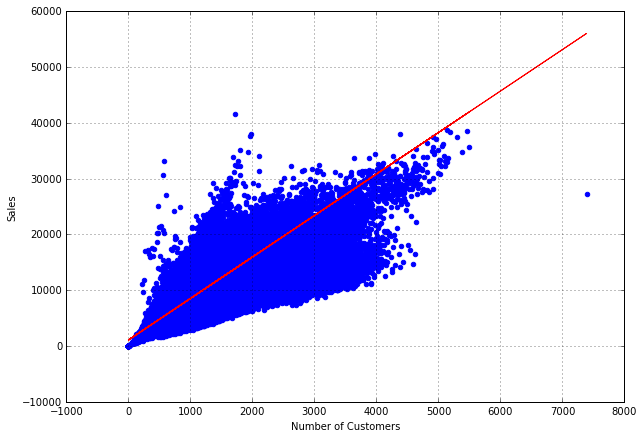

In [7]:
# extract the data
y = train['Sales'].values.astype('float')
customers = train['Customers'].values.astype('float')

# get the regression parameters
slope_lin, intercept_lin = np.polyfit(customers, y, 1)
lin_reg = intercept_lin + slope_lin*customers

# plot the data and the regression
plt.figure(figsize=(10,7))
plt.scatter(customers, y, color = "blue")
plt.plot(customers, lin_reg, color = 'red')
plt.xlabel('Number of Customers'); plt.ylabel(r'Sales')
plt.grid()

Looking at the graph above, the relationship look linear, but heteroskedasticity is present. Could it be that different store types have different imapact of the number of customers on the sales?

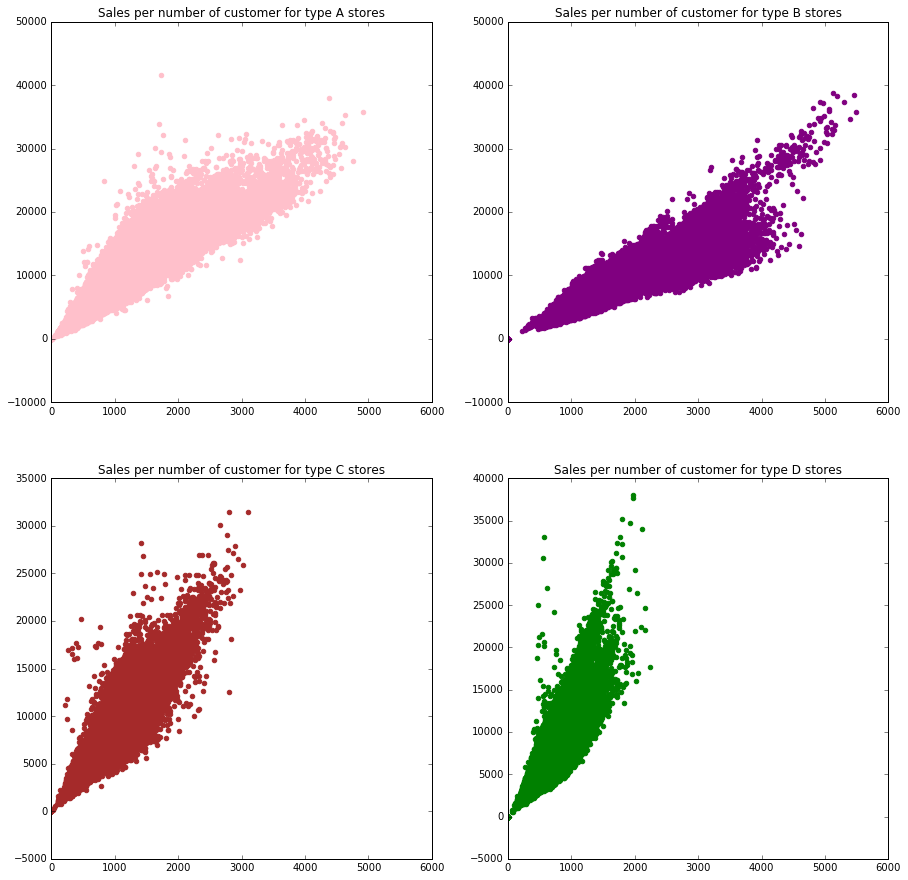

In [136]:
# get indices for each store
store_a_indices = store['Store'][store['StoreType'] == 'a']
store_b_indices = store['Store'][store['StoreType'] == 'b']
store_c_indices = store['Store'][store['StoreType'] == 'c']
store_d_indices = store['Store'][store['StoreType'] == 'd']

# get the respective sales figures
stores_a_sales = train['Sales'].loc[train['Store'].isin(store_a_indices)]
stores_b_sales = train['Sales'].loc[train['Store'].isin(store_b_indices)]
stores_c_sales = train['Sales'].loc[train['Store'].isin(store_c_indices)]
stores_d_sales = train['Sales'].loc[train['Store'].isin(store_d_indices)]

# get the respective customers figures
stores_a_customers = train['Customers'].loc[train['Store'].isin(store_a_indices)]
stores_b_customers = train['Customers'].loc[train['Store'].isin(store_b_indices)]
stores_c_customers = train['Customers'].loc[train['Store'].isin(store_c_indices)]
stores_d_customers = train['Customers'].loc[train['Store'].isin(store_d_indices)]

# plot sales per store
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

ax1.scatter(stores_a_customers, stores_a_sales, color = "pink")
ax1.set_xlim([0,6000])
ax1.set_title('Sales per number of customer for type A stores') 

ax2.scatter(stores_b_customers, stores_b_sales, color = "purple")
ax2.set_xlim([0,6000])
ax2.set_title('Sales per number of customer for type B stores') 

ax3.scatter(stores_c_customers, stores_c_sales, color = "brown")
ax3.set_xlim([0,6000])
ax3.set_title('Sales per number of customer for type C stores') 

ax4.scatter(stores_d_customers, stores_d_sales, color = "green")
ax4.set_xlim([0,6000])
ax4.set_title('Sales per number of customer for type D stores')

**Observation**:
Looking at the graphs above it is clear that type C and D stores have noticeably higher sales per customer than type A and B stores. Are the former concetrated in areas where the wealthier people reside? In addition, the "cheaper" stores have higher sales variances than the "more expensive" ones. Why is that so? Is it due to a different profile of customers, the store size or some other factor? Let's investigate further to try to find some answers.

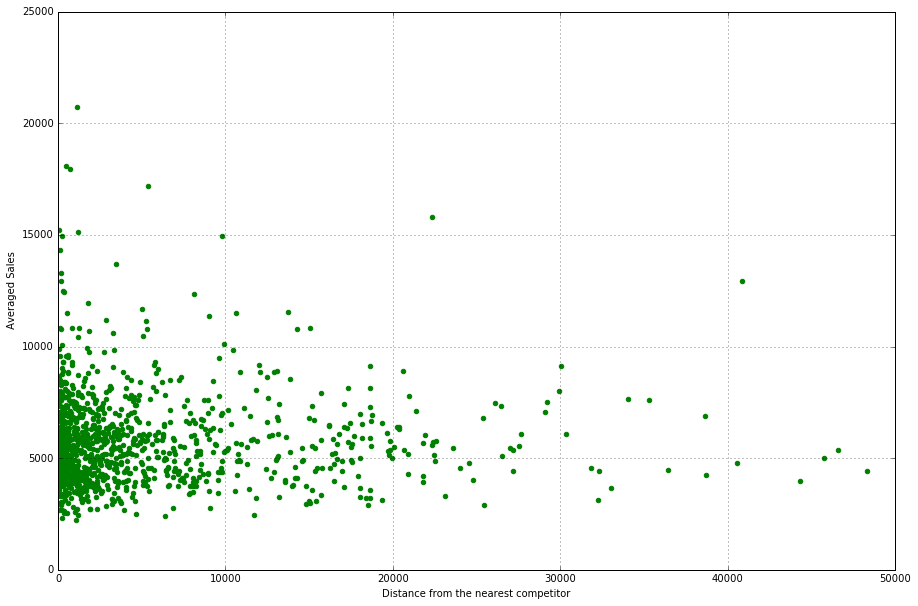

In [137]:
means = []
for i in range(0,1115):
    means.append(np.mean(train['Sales'].loc[train['Store'] == i]))
    
# plot the mean
plt.figure(figsize=(15,10))
plt.scatter(store['CompetitionDistance'], means, color = "green")
plt.xlim([0,50000])
plt.xlabel('Distance from the nearest competitor'); plt.ylabel(r' Averaged Sales')
plt.grid()
plt.show()

The above graph shows the mean sales over time plotted as a function of distance from the nearest competitor. It seems like there is no visible relationship between the two.

In [79]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [76]:
# initalize the list
day_values = []
by_day = []

# loop through each year
for i in range(0,3):
    # obtain the yearly data
    yearly_data = train.loc[train['Date'].str.endswith(str(i+13), na=False)]
    # find the sales for each day and sum them up
    for j in range(1,8):
        day_data = yearly_data['Sales'].loc[yearly_data['DayOfWeek'] == j]
        by_day.append(day_data)
        day_values.append(sum(day_data))

# split the list in order to get the yearly data
year_2013_by_day = day_values[0:7]
year_2014_by_day = day_values[7:14]
year_2015_by_day = day_values[14:21]

# day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x = range(1,8)

In [77]:
by_day[0].values[:]

array([  7193.,   7528.,  10503., ...,   8984.,  21237.,   6905.])

In [78]:
box_data = pd.DataFrame()

for i in range(0,7):
    temp_data = pd.DataFrame({days[i]:by_day[i].values})
    box_data.loc[:,i] = temp_data
box_data.head()

,0,1,2,3,4,5,6
0,7193.0,2362.0,0.0,0.0,6110.0,5659.0,0.0
1,7528.0,2148.0,0.0,0.0,5582.0,3561.0,0.0
2,10503.0,4081.0,0.0,0.0,8158.0,3927.0,0.0
3,17412.0,9813.0,0.0,0.0,11159.0,10954.0,0.0
4,6681.0,2009.0,0.0,0.0,5516.0,2303.0,0.0


**Comment**:
We were not able to boxplot days for the chosen 3 years (2013,2014,2015), but we most definitely will do it in the final version. Let's now explore how the total amount of sales for each day of the week varies for the above mentioned years.

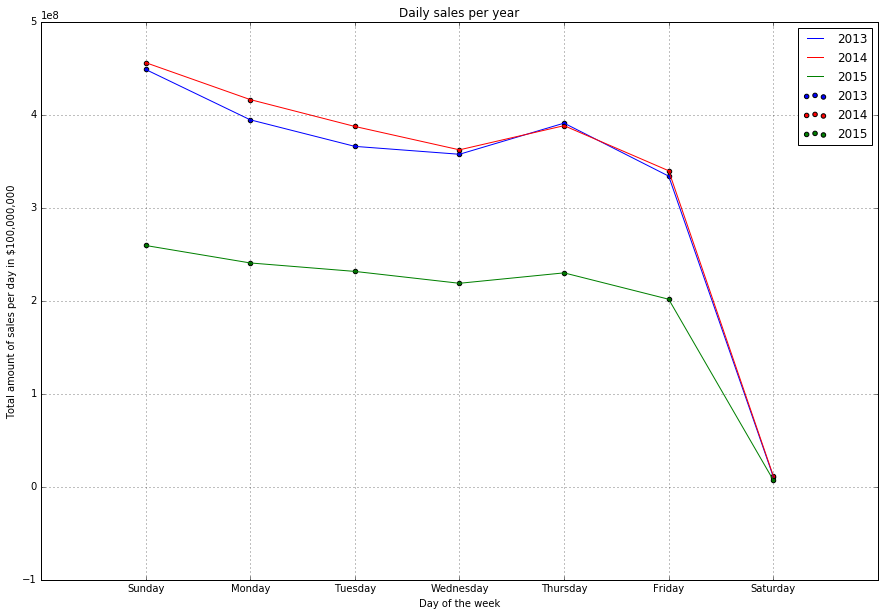

In [79]:


fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.scatter(x, year_2013_by_day, c='b', label='2013')
ax.plot(x, year_2013_by_day, c='b', label='2013')

ax.scatter(x, year_2014_by_day, c='r', label='2014')
ax.plot(x, year_2014_by_day, c='r', label='2014')

ax.scatter(x, year_2015_by_day, c='g', label='2015')
ax.plot(x, year_2015_by_day, c='g', label='2015')

ax.set_xlabel('Day of the week')
ax.set_ylabel('Total amount of sales per day in $100,000,000')
ax.set_title('Daily sales per year')

plt.xticks(x, days)
ax.legend(loc = 'best')
plt.grid()
plt.show()

The graph above shows that Sundays are usually the busiest while Saturdays are the least busy. The weekdays have had about the same relative amount of sales through all 3 years. In addition to observing seasonality, we can see that the sales sifgnificantly declined in 2015 compared to 2013 and 2014. This graph shows that using time series to predict the sales might be the way to go.

In [120]:
# create columns for further data visualization
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))
train['Year-Month'] = train['Date'].apply(lambda x: str(x)[:7])

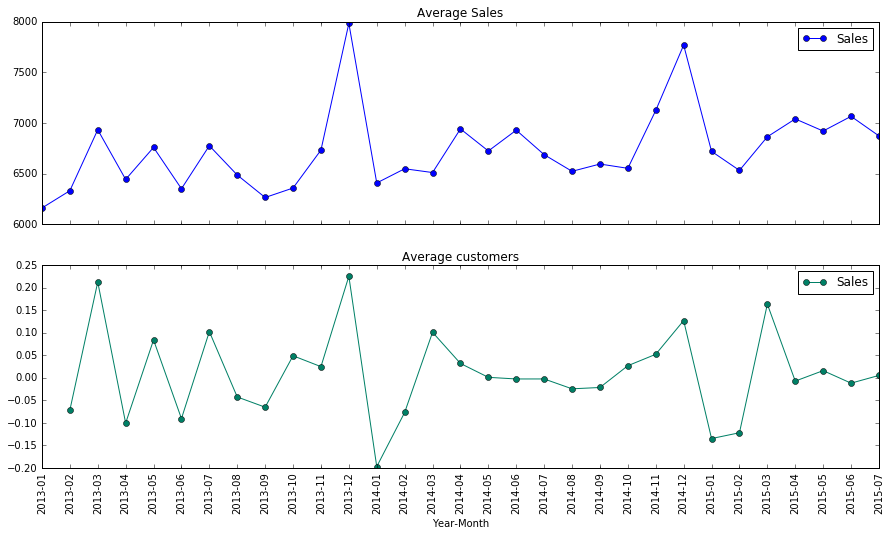

In [132]:
# group by date and get average sales, and precent change
average_sales    = train.groupby('Year-Month')["Sales"].mean()
average_customers = train.groupby('Year-Month')["Customers"].mean()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Average customers")

Above we can see that the there is a monthly seasonality trend when it comes to sales. December seems to be the busiest month (Christmas time?), while the period from August to November seems to be slim (as well as January). Can we take advantage of this finding in our model?

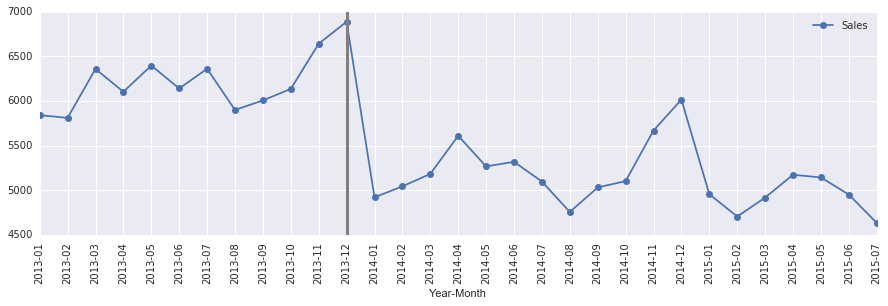

In [156]:
store_id = 6
store_data = train[train["Store"] == store_id]

average_store_sales = store_data.groupby('Year-Month')["Sales"].mean()

# Get year, and month when Competition started
y = store["CompetitionOpenSinceYear"].loc[store["Store"]  == store_id].values[0]
m = store["CompetitionOpenSinceMonth"].loc[store["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

The graph above shows us what happens when the competition opens in the vicinity. The sales sharply go down and they struggle to reach the previous heights. It makes sense to include the "CompetitionOpenSince" in the model. Knowing that this is important, we can now proceed to data modeling.

---

In [6]:
%%html

Page Links — <a href="index.html" target="_self">Project Overview Page</a>
— <a href="page1.html" target="_self">Dataset Page</a>
— <a href="page2.html" target="_self">Data Imputation Page</a>
— <a href="page3.html" target="_self">Data Exploration Page</a>
— <a href="page4.html" target="_self">Data Modeling Page</a>